In [1]:
# Import the libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = "/content/drive/MyDrive/maj us flight - january 2024.csv"
df = pd.read_csv(file_path, header=0, sep=',')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FlightDate  Day_Of_Week       Airline Tail_Number Dep_Airport  \
0  2023-01-02            1  Endeavor Air      N605LR         BDL   
1  2023-01-03            2  Endeavor Air      N605LR         BDL   
2  2023-01-04            3  Endeavor Air      N331PQ         BDL   
3  2023-01-05            4  Endeavor Air      N906XJ         BDL   
4  2023-01-06            5  Endeavor Air      N337PQ         BDL   

   Dep_CityName DepTime_label  Dep_Delay  Dep_Delay_Tag Dep_Delay_Type  ...  \
0  Hartford, CT       Morning         -3              0      Low <5min  ...   
1  Hartford, CT       Morning         -5              0      Low <5min  ...   
2  Hartford, CT       Morning         -5              0      Low <5min  ...   
3  Hartford, CT       Morning         -6              0      Low <5min  ...   
4  Hartford, CT       Morning         -1              0      Low <5min  ...   

  Flight_Duration       Distance_type  Delay_Carrier Delay_Weather  Delay_NAS  \
0              56  Short Haul >1500Mi              0             0          0   
1              62  Short Haul >1500Mi              0             0          0   
2              49  Short Haul >1500Mi              0             0          0   
3              54  Short Haul >1500Mi              0             0          0   
4              50  Short Haul >1500Mi              0             0          0   

  Delay_Security  Delay_LastAircraft           Manufacturer  Model  \
0              0                   0  CANADAIR REGIONAL JET    CRJ   
1              0                   0  CANADAIR REGIONAL JET    CRJ   
2              0                   0  CANADAIR REGIONAL JET    CRJ   
3              0                   0  CANADAIR REGIONAL JET    CRJ   
4              0                   0  CANADAIR REGIONAL JET    CRJ   

   Aicraft_age  
0           16  
1           16  
2           10  
3           17  
4           10  

[5 rows x 24 columns]

In [3]:
df.shape

(527197, 24)

In [4]:
df.describe()

Day_Of_Week      Dep_Delay  Dep_Delay_Tag      Arr_Delay  \
count  527197.000000  527197.000000   527197.00000  527197.000000   
mean        3.914855      12.840955        0.38288       7.776393   
std         2.077295      54.958138        0.48609      57.396811   
min         1.000000     -52.000000        0.00000     -80.000000   
25%         2.000000      -6.000000        0.00000     -15.000000   
50%         4.000000      -2.000000        0.00000      -5.000000   
75%         6.000000      10.000000        1.00000      11.000000   
max         7.000000    3024.000000        1.00000    3063.000000   

       Flight_Duration  Delay_Carrier  Delay_Weather      Delay_NAS  \
count    527197.000000  527197.000000  527197.000000  527197.000000   
mean        142.174665       5.425977       0.970540       3.242941   
std          73.880806      36.153713      18.004349      16.470654   
min          17.000000       0.000000       0.000000       0.000000   
25%          88.000000       0.000000       0.000000       0.000000   
50%         126.000000       0.000000       0.000000       0.000000   
75%         174.000000       0.000000       0.000000       0.000000   
max         749.000000    3024.000000    1653.000000    1343.000000   

       Delay_Security  Delay_LastAircraft    Aicraft_age  
count   527197.000000       527197.000000  527197.000000  
mean         0.032377            5.701910      13.957877  
std          1.363879           29.094514       7.752557  
min          0.000000            0.000000       1.000000  
25%          0.000000            0.000000       7.000000  
50%          0.000000            0.000000      13.000000  
75%          0.000000            0.000000      21.000000  
max        234.000000         2027.000000      57.000000

In [5]:
df['Airline'].value_counts()


Airline
Southwest Airlines Co.          108999
Delta Air Lines Inc              74419
American Airlines Inc.           73454
United Air Lines Inc.            56102
Skywest Airlines Inc.            48378
Republic Airways                 24049
JetBlue Airways                  22978
Spirit Air Lines                 21348
Alaska Airlines Inc.             19421
American Eagle Airlines Inc.     18325
Endeavor Air                     16637
PSA Airlines                     15165
Frontier Airlines Inc.           12828
Allegiant Air                     8478
Hawaiian Airlines Inc.            6616
Name: count, dtype: int64

In [6]:
df.info()
df.isnull().sum()

# FlightDate ‚Üí datetime
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

# Day_Of_Week ‚Üí category
df['Day_Of_Week'] = df['Day_Of_Week'].astype('category')

# DepTime_label ‚Üí category v·ªõi th·ª© t·ª± Morning < Afternoon < Evening
time_order = ['Morning', 'Afternoon', 'Evening']
df['DepTime_label'] = pd.Categorical(df['DepTime_label'], categories=time_order, ordered=True)

# Airline, Dep/Arr Airport/City, Manufacturer, Model ‚Üí category
categorical_cols = ['Airline', 'Dep_Airport', 'Dep_CityName', 'Arr_Airport',
                    'Arr_CityName', 'Manufacturer', 'Model']
for col in categorical_cols:
    df[col] = df[col].astype('category')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527197 entries, 0 to 527196
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   FlightDate          527197 non-null  object
 1   Day_Of_Week         527197 non-null  int64 
 2   Airline             527197 non-null  object
 3   Tail_Number         527197 non-null  object
 4   Dep_Airport         527197 non-null  object
 5   Dep_CityName        527197 non-null  object
 6   DepTime_label       527197 non-null  object
 7   Dep_Delay           527197 non-null  int64 
 8   Dep_Delay_Tag       527197 non-null  int64 
 9   Dep_Delay_Type      527197 non-null  object
 10  Arr_Airport         527197 non-null  object
 11  Arr_CityName        527197 non-null  object
 12  Arr_Delay           527197 non-null  int64 
 13  Arr_Delay_Type      527197 non-null  object
 14  Flight_Duration     527197 non-null  int64 
 15  Distance_type       527197 non-null  object
 16  De

In [7]:
df['DepTime_label'].value_counts()

DepTime_label
Morning      205409
Afternoon    188313
Evening      118329
Name: count, dtype: int64

In [8]:
df['Day_Of_Week'].value_counts()

Day_Of_Week
1    88165
7    85862
2    82918
5    72107
4    71654
3    65744
6    60747
Name: count, dtype: int64

In [13]:
delay_columns = [
    'Delay_Carrier',
    'Delay_Weather',
    'Delay_NAS', # National Air System Delay
    'Delay_Security',
    'Delay_LastAircraft'
]

df['Total_Delay'] = df[delay_columns].sum(axis=1)

print(df[['Delay_Carrier', 'Delay_LastAircraft', 'Total_Delay']].head())

   Delay_Carrier  Delay_LastAircraft  Total_Delay
0              0                   0            0
1              0                   0            0
2              0                   0            0
3              0                   0            0
4              0                   0            0


/tmp/ipython-input-3322649378.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


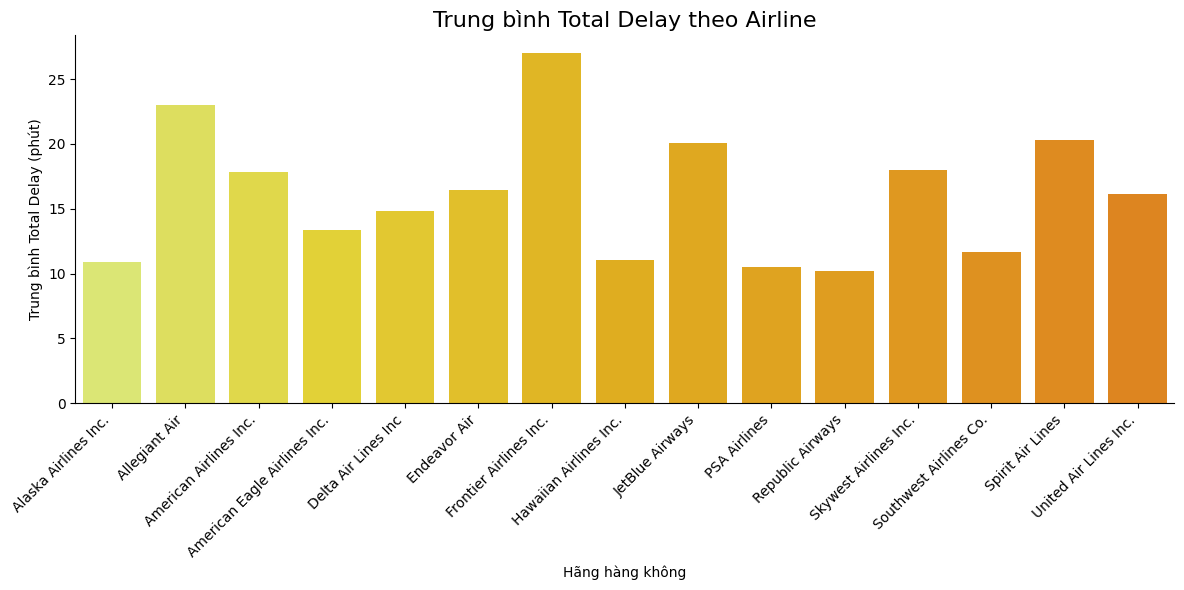

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=df,
    x='Airline',
    y='Total_Delay',
    errorbar=None,
    palette='Wistia'
)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Trung b√¨nh Total Delay (ph√∫t)")
plt.xlabel("H√£ng h√†ng kh√¥ng")
plt.title("Trung b√¨nh Total Delay theo Airline", fontsize=16)
sns.despine()
plt.tight_layout()
plt.show()

# Flight Delay Analysis ‚Äì Multi-Airline Dataset

**M·ª•c ti√™u:** Ph√¢n t√≠ch d·ªØ li·ªáu chuy·∫øn bay (15 h√£ng) ƒë·ªÉ:
1. Hi·ªÉu patterns v·ªÅ ƒë·ªô tr·ªÖ kh·ªüi h√†nh v√† ƒë·∫øn.
2. So s√°nh ƒë·ªô tr·ªÖ gi·ªØa c√°c h√£ng, khung gi·ªù, ng√†y trong tu·∫ßn.
3. X√°c ƒë·ªãnh nguy√™n nh√¢n ch√≠nh g√¢y tr·ªÖ.
4. Ph√¢n t√≠ch ·∫£nh h∆∞·ªüng c·ªßa model & tu·ªïi m√°y bay.
5. R√∫t ra insights th·ª±c t·∫ø cho h√†nh kh√°ch v√† h√£ng bay.

**Dataset:** Th√¥ng tin chuy·∫øn bay: FlightDate, Airline, Dep/Arr Airport, Dep/Arr Delay, Tail_Number, Model, Aircraft_age, nguy√™n nh√¢n tr·ªÖ, ‚Ä¶


/tmp/ipython-input-1601229268.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DepTime_label', y='Dep_Delay', data=df, palette='Set2')


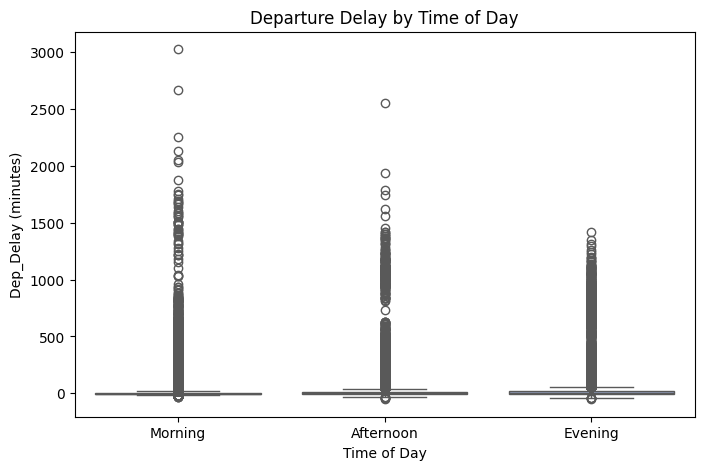

In [38]:
plt.figure(figsize=(8,5))
sns.boxplot(x='DepTime_label', y='Dep_Delay', data=df, palette='Set2')
plt.title('Departure Delay by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Dep_Delay (minutes)')
plt.show()

/tmp/ipython-input-2234889225.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Day_Of_Week', y='Dep_Delay', data=df, palette='Pastel1')


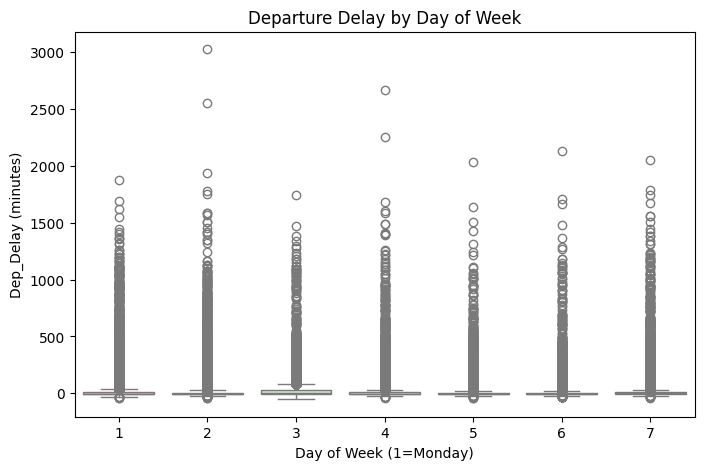

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Day_Of_Week', y='Dep_Delay', data=df, palette='Pastel1')
plt.title('Departure Delay by Day of Week')
plt.xlabel('Day of Week (1=Monday)')
plt.ylabel('Dep_Delay (minutes)')
plt.show()

/tmp/ipython-input-2645887453.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delay = df.groupby('Airline')['Dep_Delay'].mean().sort_values(ascending=False)
/tmp/ipython-input-2645887453.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


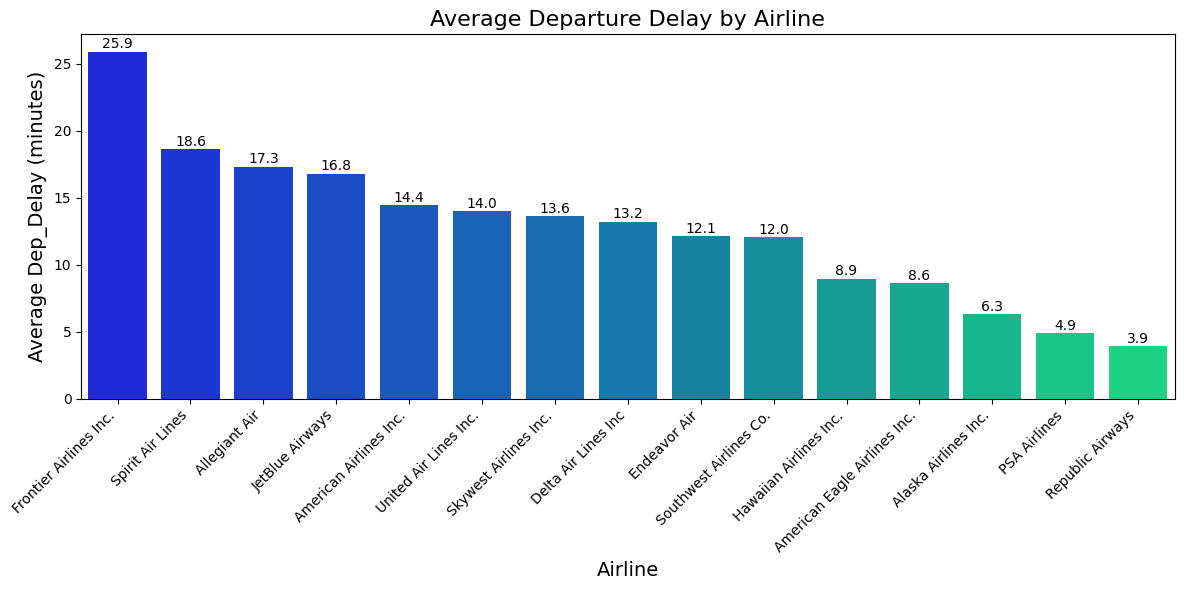

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_delay = df.groupby('Airline')['Dep_Delay'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(
    x=avg_delay.index,
    y=avg_delay.values,
    palette=sns.color_palette("winter", n_colors=len(avg_delay)),
    order=avg_delay.index)
plt.title('Average Departure Delay by Airline', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Average Dep_Delay (minutes)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotation
for i, v in enumerate(avg_delay.values):
    plt.text(i, v + max(avg_delay.values)*0.01, f"{v:.1f}", ha='center', fontsize=10)

plt.show()

In [28]:
print("Gi√° tr·ªã th·ª±c t·∫ø trong DepTime_label:")
print(df['DepTime_label'].unique())

Gi√° tr·ªã th·ª±c t·∫ø trong DepTime_label:
['Morning', 'Afternoon', 'Evening', NaN]
Categories (3, object): ['Morning' < 'Afternoon' < 'Evening']


/tmp/ipython-input-613764924.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heat_df = df.groupby(['DepTime_label', 'Day_Of_Week'])['Dep_Delay'].mean().reset_index()


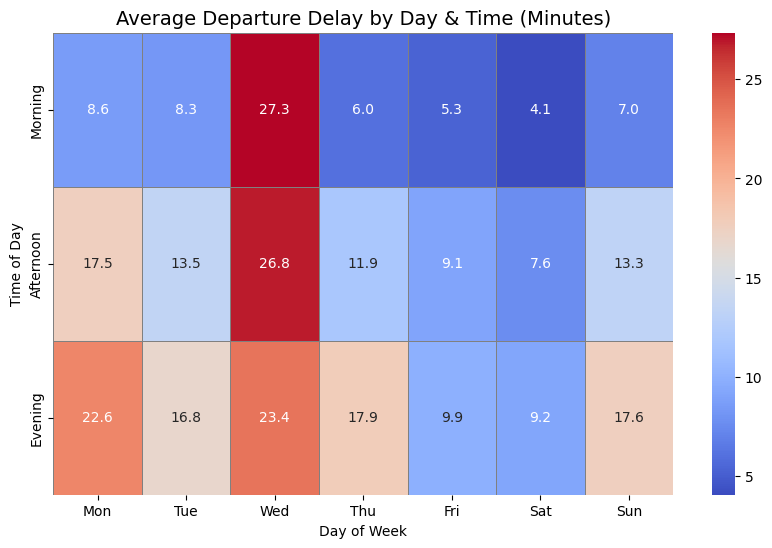

In [29]:
# 1. T·∫°o heat_df: T√≠nh trung b√¨nh ƒë·ªô tr·ªÖ (Dep_Delay)
heat_df = df.groupby(['DepTime_label', 'Day_Of_Week'])['Dep_Delay'].mean().reset_index()
heat_df = heat_df.rename(columns={'Dep_Delay': 'Avg_Dep_Delay'})

# 2. T·∫°o heatmap_data: Chuy·ªÉn ƒë·ªïi heat_df sang ƒë·ªãnh d·∫°ng ma tr·∫≠n
heatmap_data = heat_df.pivot(index='DepTime_label', columns='Day_Of_Week', values='Avg_Dep_Delay')

# 3. S·∫Øp x·∫øp th·ª© t·ª± cho bi·ªÉu ƒë·ªì (ƒê√É S·ª¨A L·ªñI KH√îNG KH·ªöP)
time_order = ['Morning', 'Afternoon', 'Evening']
day_order = [1, 2, 3, 4, 5, 6, 7] # 1=Monday ƒë·∫øn 7=Sunday

heatmap_data = heatmap_data.reindex(index=time_order)
heatmap_data = heatmap_data[day_order]

# 4. V·∫Ω Heatmap v√† L∆∞u ·∫¢nh
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='gray'
)

# Thay th·∫ø nh√£n tr·ª•c X (s·ªë 1-7) b·∫±ng t√™n ng√†y (Mon-Sun)
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(np.arange(len(day_labels)) + 0.5, day_labels, rotation=0)

plt.title('Average Departure Delay by Day & Time (Minutes)', fontsize=14)
plt.xlabel('Day of Week')
plt.ylabel('Time of Day')

# L∆∞u ·∫£nh
plt.savefig('average_delay_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

**T·ª´ ƒë√¢y c√≥ th·ªÉ th·∫•y S√°ng v√† Tr∆∞a th·ª© 4 l√† ng√†y th·ªùi ƒëi·ªÉm th∆∞·ªùng xuy√™n b·ªã
delay nh·∫•t**
Ch√∫ng ta s·∫Ω t√¨m ra xem nguy√™n nh√¢n n√†o g√¢y tr·ªÖ nhi·ªÅu nh·∫•t v√†o th·ªùi ƒëi·ªÉm n√†y

In [35]:
df['Day_Of_Week'] = df['Day_Of_Week'].astype(int)

# L·ªçc Morning Wednesday
subset = df[(df['DepTime_label']=='Morning') & (df['Day_Of_Week']==3)]
subset = df[(df['DepTime_label']=='Afternoon') & (df['Day_Of_Week']==3)]

# T·ªïng s·ªë ph√∫t tr·ªÖ theo nguy√™n nh√¢n
delay_cols = ['Delay_Carrier','Delay_Weather','Delay_NAS','Delay_Security','Delay_LastAircraft']
delay_sum = subset[delay_cols].sum()

print("T·ªïng s·ªë ph√∫t tr·ªÖ theo nguy√™n nh√¢n (Morning and Afternoon Wednesday):")
print(delay_sum)

T·ªïng s·ªë ph√∫t tr·ªÖ theo nguy√™n nh√¢n (Morning and Afternoon Wednesday):
Delay_Carrier         152471
Delay_Weather          26170
Delay_NAS             122729
Delay_Security           837
Delay_LastAircraft    364665
dtype: int64


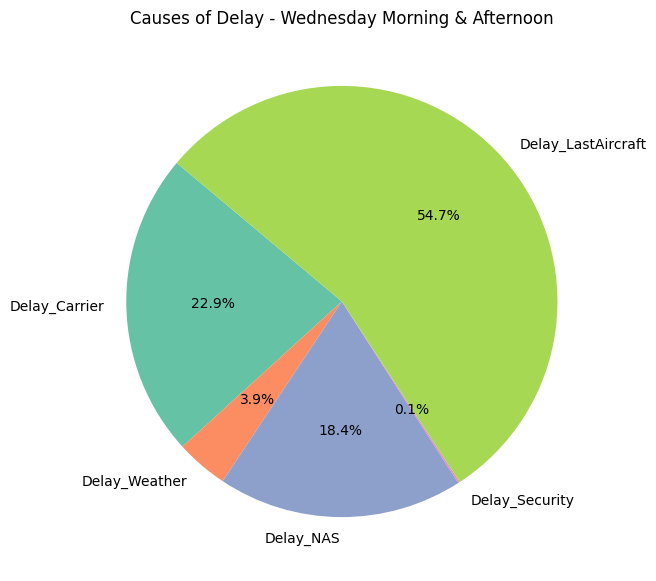

In [37]:
plt.figure(figsize=(7,7))
plt.pie(delay_sum, labels=delay_sum.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2', len(delay_sum)))
plt.title('Causes of Delay - Wednesday Morning & Afternoon')
plt.show()

## üí° T√≥m T·∫Øt Insight Nguy√™n Nh√¢n Tr·ªÖ Chuy·∫øn Bay

Nguy√™n nh√¢n **Tr·ªÖ Chuy·∫øn Bay D√¢y Chuy·ªÅn (Delay_LastAircraft)** l√† y·∫øu t·ªë √°p ƒë·∫£o, chi·∫øm t·ªõi **54.7%** t·ªïng s·ªë l·∫ßn ch·∫≠m tr·ªÖ. ƒêi·ªÅu n√†y cho th·∫•y s·ª± ch·∫≠m tr·ªÖ t·ª´ chuy·∫øn bay tr∆∞·ªõc l√† nguy√™n nh√¢n ch√≠nh g√¢y ra s·ª± gi√°n ƒëo·∫°n l·ªãch tr√¨nh.

---

### C√°c Nguy√™n Nh√¢n Quan Tr·ªçng Kh√°c

| Nguy√™n Nh√¢n | T·ª∑ Tr·ªçng | N·ªôi Dung |
| :--- | :--- | :--- |
| **Tr·ªÖ do H√£ng Bay (Delay_Carrier)** | **22.9%** | ƒê·ª©ng th·ª© hai, li√™n quan ƒë·∫øn c√°c v·∫•n ƒë·ªÅ v·∫≠n h√†nh n·ªôi b·ªô c·ªßa h√£ng (k·ªπ thu·∫≠t, phi h√†nh ƒëo√†n, v.v.). |
| **Tr·ªÖ do H·ªá th·ªëng Kh√¥ng L∆∞u (Delay_NAS)** | **18.4%** | G√¢y ra b·ªüi t·∫Øc ngh·∫Ωn kh√¥ng ph·∫≠n ho·∫∑c c√°c y·∫øu t·ªë ngo·∫°i c·∫£nh thu·ªôc h·ªá th·ªëng kh√¥ng l∆∞u. |

### T√°c ƒê·ªông G·∫ßn Nh∆∞ Kh√¥ng ƒê√°ng K·ªÉ

* **Tr·ªÖ do Th·ªùi Ti·∫øt (Delay_Weather)** ch·ªâ chi·∫øm **3.9%**.
* **Tr·ªÖ do An Ninh (Delay_Security)** g·∫ßn nh∆∞ kh√¥ng c√≥ t√°c ƒë·ªông, ch·ªâ **0.1%**.

---

### K·∫øt Lu·∫≠n H√†nh ƒê·ªông

* **ƒê·ªëi v·ªõi H√†nh kh√°ch**: N·∫øu bay v√†o s√°ng/tr∆∞a/chi·ªÅu gi·ªØa tu·∫ßn (Th·ª© T∆∞), c·∫ßn l∆∞u √Ω nguy c∆° tr·ªÖ cao nh·∫•t l√† do c√°c **v·∫•n ƒë·ªÅ v·∫≠n h√†nh d√¢y chuy·ªÅn**.
* **ƒê·ªëi v·ªõi H√£ng H√†ng kh√¥ng**: C·∫ßn t·∫≠p trung c·∫£i thi·ªán hi·ªáu qu·∫£ **quay v√≤ng m√°y bay (turnaround time)** v√† t·ªëi ∆∞u h√≥a l·ªãch tr√¨nh ƒë·ªÉ gi·∫£m thi·ªÉu t√°c ƒë·ªông c·ªßa tr·ªÖ d√¢y chuy·ªÅn, ƒë·∫∑c bi·ªát v√†o gi·ªØa tu·∫ßn.